In [1]:
# 각 속성별 빈도수 데이터 : 리스트로 가져오기

# 속성별로 분류한 텍스트 데이터에서 딕셔너리 가져오는 함수 
def get_dict(file):
    with open(file,'r',encoding='UTF8') as f:
        sents = []
        while True:
            line = f.readline()
            if not line: # '' 의 길이는 1, 컨텐츠가  없을 때는 0
                break
            sents.append(line.strip().replace(",","").replace("'","").replace("(","").replace(")","").split())
        
        fdist = dict()
        
        for sent in sents:
            fdist[sent[0]] = int(sent[1])

        return fdist

#데이터 저장
health = get_dict('./data/health.txt')
quality_stability = get_dict('./data/quality&stability.txt')
price = get_dict('./data/price.txt')
flavor = get_dict('./data/flavor.txt')
brand = get_dict('./data/brand.txt')

In [2]:
!pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

Processing c:\users\jung_a\2. socialmedia_analytics\wordcloud-1.8.1-cp39-cp39-win_amd64.whl
wordcloud is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [3]:
# 필요 모듈 임포트

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
# 이미지, 색 관련 모듈 불러오기
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator 

In [5]:
# wordCloud 그리는 함수 만들기
def get_wordCloud(png,font,boderColor,size,data): #이미지파일이름, 폰트이름, 선 색, 사이즈, 빈도수데이터
    img = Image.open(png)
    img_array = np.array(img)

    wc = WordCloud(font_path=font, width=400, height=400, mask=img_array,background_color='white',contour_width=2,contour_color=boderColor, max_font_size=150)
    gen = wc.generate_from_frequencies(data)

    image_colors = ImageColorGenerator(img_array)
    gen.recolor(color_func = image_colors)

    plt.figure(figsize=size)
    plt.axis('off')

    plt.imshow(gen)

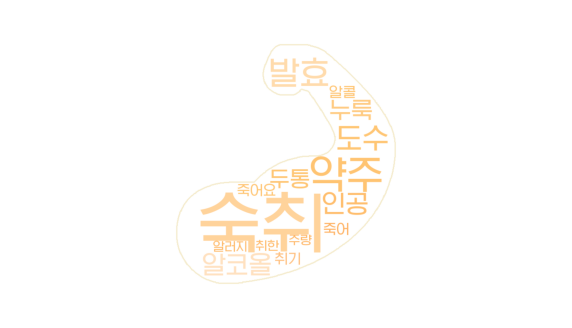

In [8]:
# 건강
get_wordCloud('./image/근육.png','a시월구일1','#F5ECCE',(10,10),health)

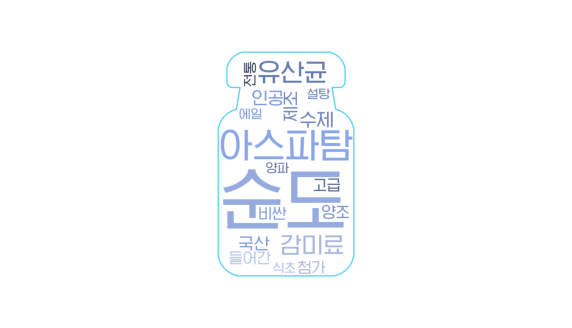

In [9]:
# 퀄리티 & 안정성
get_wordCloud('./image/약병.png','a시월구일1','#5BD3EF',(10,10),quality_stability)

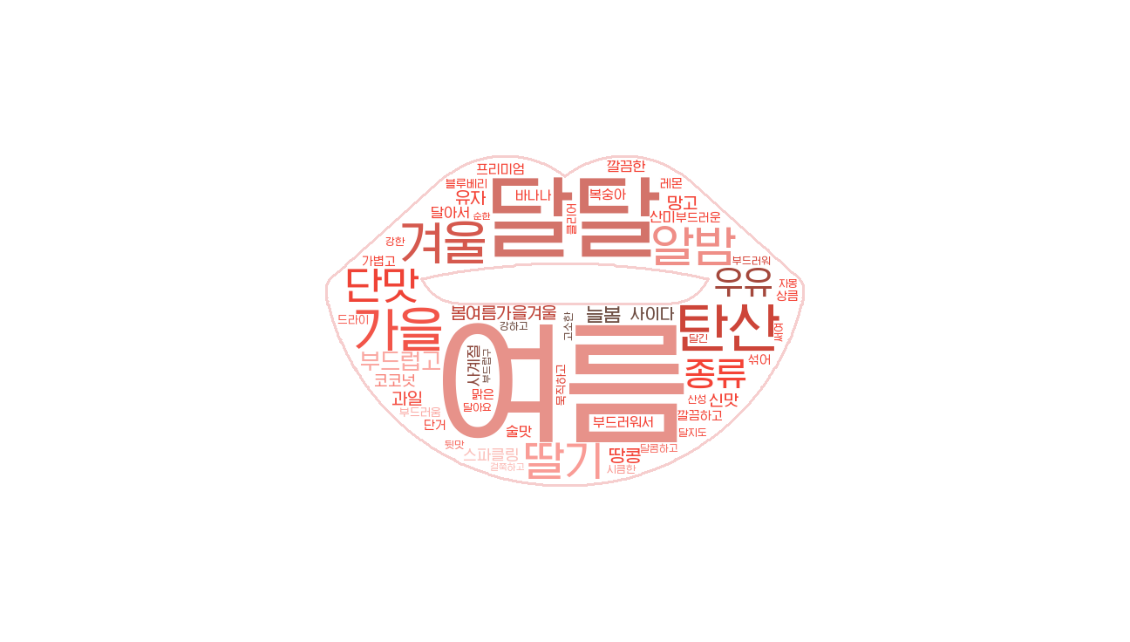

In [10]:
# 맛
get_wordCloud('./image/입술.png','a시월구일1','#F6CECE',(20,20),flavor)

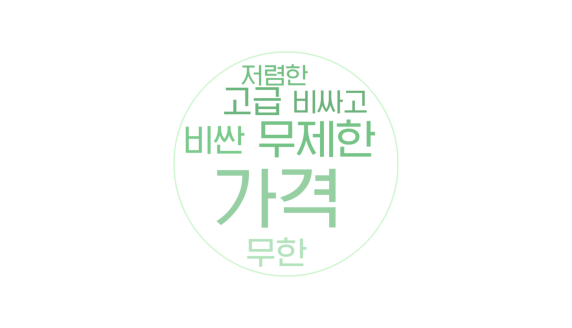

In [11]:
# 가격
get_wordCloud('./image/코인.png','a시월구일1','#CEF6CE',(10,10),price)

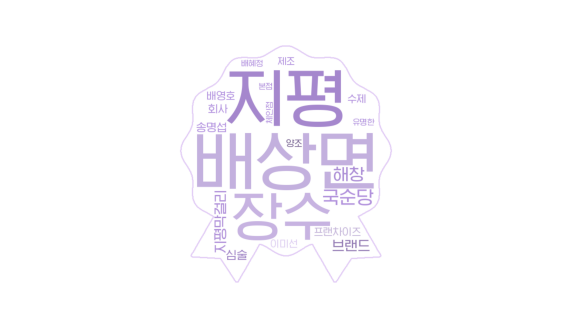

In [12]:
# 브랜드
get_wordCloud('./image/브랜드.png','a시월구일1','#E3CEF6',(10,10),brand)